# **Arbeidskrav 5 - Kristiansund ( Møre og Romsdal )**


*av Sophie Haugenes Kristiansen*

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I løpet av denne oppgaven skal det presenteres ulik data fra SSB. Det skal ta utgangspunkt i Kristiansund kommune i Møre og Romsdal. Til slutt skal vi sammenligne noen av dataen vi har presentert og manipulert med Tromsø kommune. Kodene er lagd på en måte for å kunne gjennbruke de letere til senere.

## Oppgave 1

In [14]:
# Leser inn CSV-filen 
df_A = pd.read_csv("C:\\Users\\sophi\\OneDrive\\Documents\\Samfunnsøkonomi med datavitenskap\\V25\\SOK-1005\\A.csv", sep=';')

# Danner en funksjon som slår sammen rader etter ut i fra ønsket intervall
def intervall(df, intervall_bredde):

    # Danner en kopi av df for å unngå å endre den opprinnelige DataFrame
    df = df.copy()

    # Konverterer alle kolonner unntatt den første til tall
    df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

    # Definerer nye rader
    ny_rader = {}

    # Definerer siste rad
    siste_rad = None

    # Definerer en tom liste for å lagre radene
    rader = []

    # Danner en løkke som går gjennom hver rad i DataFrame
    for i in range(len(df)):

        # Definerer den endrede kolonnen
        kolonnen = df.iloc[i, 0]

        # Sjekker om kolonnen inneholder "eller eldre" og lagrer den siste raden da det ikke finnes flere verdier
        # Til senere bruk kan man også definere før eller etter hvis det for eksempel blir brukt årstall
        # Dette defineres også her. Ved før vil det være viktig å definere at denne raden skal hoppes over før man slår sammen radene.
        if "eller eldre" in kolonnen:
            siste_rad = df.iloc[i]
            continue

        try:
            # Henter ut startverdien fra kolonnen
            # hvis vi tar eksempelet videre med årstall, hvor den starter med før før verdien, vil denne hoppes over her og viser denne som verdi alene.
            # Henter ut første verdi i i alle radene i kolonnen
            # 0-9 år blir startet til 0
            start = int(kolonnen.split('-')[0])
            slutt = int(kolonnen.split('-')[1].split()[0])
            # Legger til start, slutt og resten av raden (uten første kolonne) i lista 'rader'
            rader.append((start, slutt, df.iloc[i, 1:].values))
            
        except:
            continue

        # Sorter rader etter verdi
        rader.sort(key=lambda x: x[0])

        # Finn minste startverdi
        if not rader:
            return pd.DataFrame(columns=df.columns)

        min_start = rader[0][0]
        max_slutt = rader[-1][1]

        # Lag intervaller
        current_start = min_start
        while current_start <= max_slutt:
            current_slutt = current_start + (intervall_bredde - 1)
            gruppe_label = f"{current_start}-{current_slutt} år"
            verdier = None

        for start, slutt, data in rader:
            if current_start <= start and slutt <= current_slutt:
                if verdier is None:
                    verdier = data.copy()
                else:
                    verdier += data

        if verdier is not None:
            ny_rader[gruppe_label] = verdier

        current_start = current_slutt + 1

    # Definerer ny dataframe
    resultat = pd.DataFrame([[label] + verdier.tolist() for label, verdier in ny_rader.items()],columns=df.columns)

    # Legg til evt. siste rad
    if siste_rad is not None:
        resultat = pd.concat([resultat, pd.DataFrame([siste_rad.tolist()], columns=df.columns)],ignore_index=True)

    return resultat

df_A1 = intervall(df_A, 10)
df_A1


KeyboardInterrupt: 

In [112]:
import pandas as pd

# Leser inn CSV-filen  
df_A = pd.read_csv("C:\\Users\\sophi\\OneDrive\\Documents\\Samfunnsøkonomi med datavitenskap\\V25\\SOK-1005\\A.csv", sep=';')

# Danner en funksjon som slår sammen rader etter ut i fra ønsket intervall
def intervall(df, intervall_bredde):

    # Danner en kopi av df for å unngå å endre den opprinnelige DataFrame
    df = df.copy()

    # Konverterer alle kolonner unntatt den første til tall
    df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

    # Definerer nye rader
    ny_rader = {}

    # Definerer siste rad
    siste_rad = None

    # Definerer en tom liste for å lagre radene
    rader = []

    # Danner en løkke som går gjennom hver rad i DataFrame
    for i in range(len(df)):

        # Definerer den endrede kolonnen
        kolonnen = df.iloc[i, 0]

        # Sjekker om kolonnen inneholder "eller eldre" og lagrer den siste raden da det ikke finnes flere verdier
        # Til senere bruk kan man også definere før eller etter hvis det for eksempel blir brukt årstall
        # Dette defineres også her. Ved før vil det være viktig å definere at denne raden skal hoppes over før man slår sammen radene.
        if "eller eldre" in kolonnen:
            siste_rad = df.iloc[i]
            continue

        try:
            # Henter ut startverdien fra kolonnen
            # hvis vi tar eksempelet videre med årstall, hvor den starter med før før verdien, vil denne hoppes over her og viser denne som verdi alene.
            # Henter ut første verdi i i alle radene i kolonnen
            # 0-9 år blir startet til 0
            start = int(kolonnen.split('-')[0])
            slutt = int(kolonnen.split('-')[1].split()[0])
            # Legger til start, slutt og resten av raden (uten første kolonne) i lista 'rader'
            rader.append((start, slutt, list(df.iloc[i, 1:].values)))
            
        except:
            continue

    # Sorter rader etter verdi
    rader.sort(key=lambda x: x[0])

    # Finn minste startverdi
    if not rader:
        return pd.DataFrame(columns=df.columns)

    min_start = rader[0][0]
    max_slutt = rader[-1][1]

    # Lag intervaller
    current_start = min_start
    while current_start <= max_slutt:
        current_slutt = current_start + (intervall_bredde - 1)
        gruppe_label = f"{current_start}-{current_slutt} år"
        verdier = None

        for start, slutt, data in rader:
            if current_start <= start and slutt <= current_slutt:
                if verdier is None:
                    verdier = data[:]
                else:
                    # Summerer element for element, håndterer None
                    verdier = [
                        (v if v is not None else 0) + (d if d is not None else 0)
                        for v, d in zip(verdier, data)
                    ]

        if verdier is not None:
            ny_rader[gruppe_label] = verdier

        current_start = current_slutt + 1

    # Definerer ny dataframe
    resultat = pd.DataFrame([[label] + verdier for label, verdier in ny_rader.items()], columns=df.columns)

    # Legg til evt. siste rad
    if siste_rad is not None:
        resultat = pd.concat([resultat, pd.DataFrame([siste_rad.tolist()], columns=df.columns)], ignore_index=True)

    return resultat

# Kjører funksjonen
df_A1 = intervall(df_A, 10)


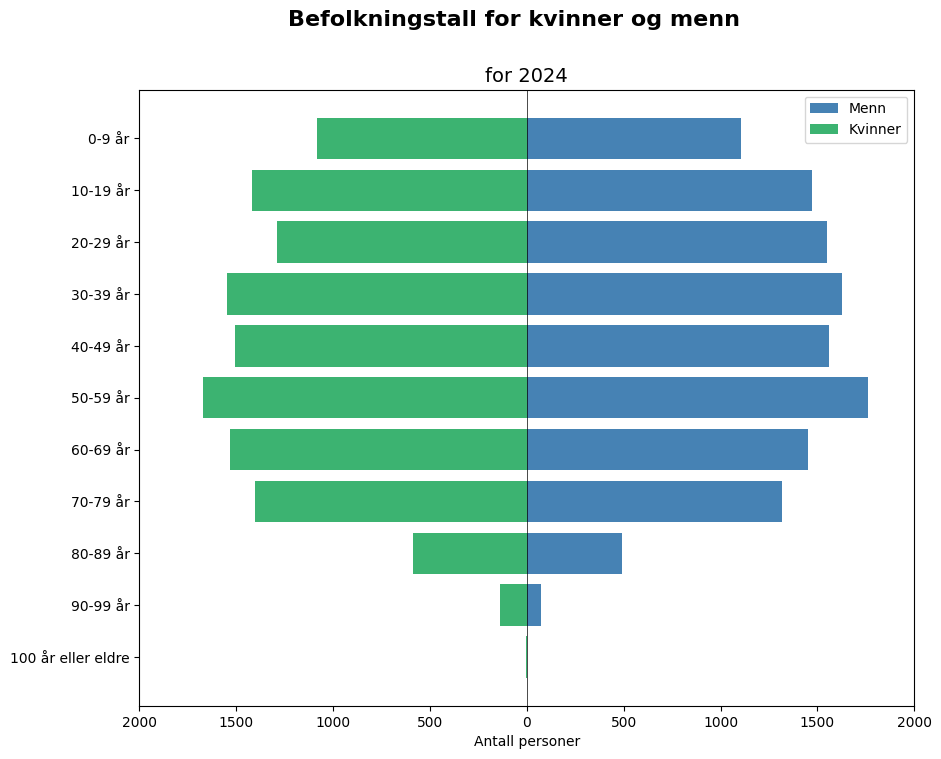

In [ ]:
# Sørg for at verdiene er positive for plotting, men menn går i negativ retning
kvinner = df_A1["Kvinner"]
menn = df_A1["Menn"]
aldersgrupper = df_A1["Alder"]

# Sett opp figuren
fig, ax = plt.subplots(figsize=(10, 8))

# Lag horisontale stolpediagrammer
ax.barh(aldersgrupper, menn, color='steelblue', label='Menn') 
ax.barh(aldersgrupper, kvinner, color='mediumseagreen', label='Kvinner') 

# Legg til midtstilt akse
ax.axvline(0, color='black', linewidth=0.5)

# Henter posisjonene til ticks og setter dem, og gjør dem om til absoluttverdi
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels([str(abs(int(tick))) for tick in ticks])

# Legg til etiketter og tittel
ax.set_xlabel("Antall personer")
# Setter overskriften
plt.suptitle("Befolkningstall for kvinner og menn", fontweight='bold', fontsize=16)
# Setter underoverskriften
ax.set_title("for 2024", fontsize=14)
ax.legend()

# Inverter y-aksen slik at aldersgruppene går ovenfra og ned
plt.gca().invert_yaxis()

# Vis plottet
plt.show()


In [ ]:
# Beregner totalbefolkning
# Koden tar i betraktning at det er 2 kjønn og at det er beregning av befolkningen
# Det er også viktig å ta hensyn til at det kan være negative verdier i datasettene
total_kvinner = df_A1['Kvinner'].abs().sum()
total_menn = df_A1['Menn'].abs().sum()
total_befolkning = total_kvinner + total_menn

# Totalbefolkningen er hentet fra SSB
if total_befolkning == 24578:
    print("Totalbefolkning er 24 578.")
else:
    print(f"Totalbefolkning korisponderer ikke med angitt innbyggertall for kommunen i følge SSB. Vi vil derfor anta at den er {total_befolkning} videre i oppgaven.")

## Oppgave 2

In [31]:
# Les inn data
df_B = pd.read_csv("C:\\Users\\sophi\\OneDrive\\Documents\\Samfunnsøkonomi med datavitenskap\\V25\\SOK-1005\\B.csv", sep=';')

# Sorter etter antall i synkende rekkefølge
df_B = df_B.sort_values(by='2025', ascending=False)
df_B['Kumulativ andel'] = df_B['2025'].cumsum() / df_B['2025'].sum() * 100

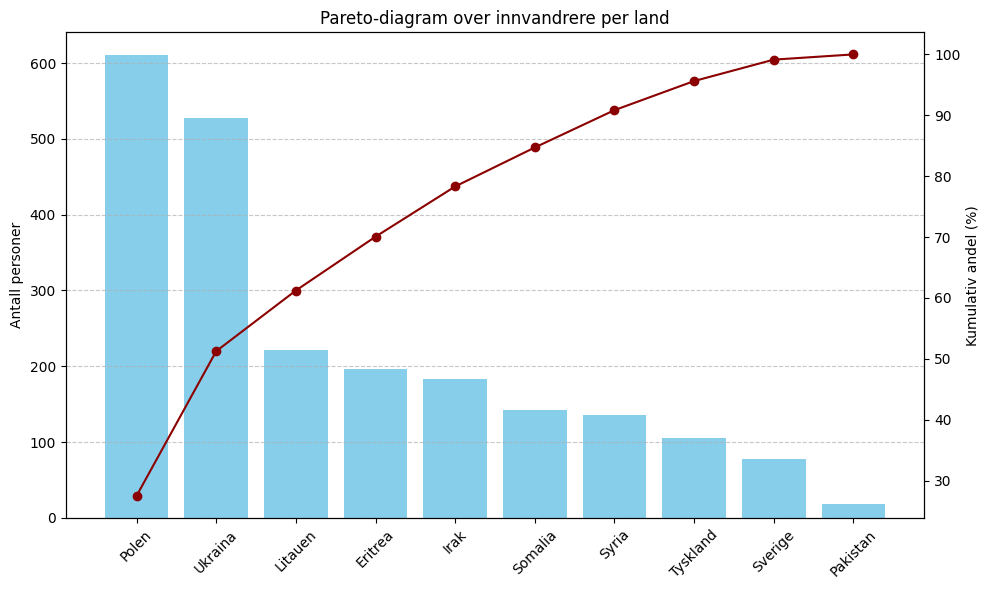

In [32]:
# Danner en modell som viser hvor mange invandrere det er fra ulike land i Kristiansund
# Plot Pareto-diagram
fig, ax1 = plt.subplots(figsize=(10,6))

# Stolpediagram for innvandrere per land
ax1.bar(df_B['Land'], df_B['2025'], color='skyblue')
ax1.set_ylabel('Antall personer')
ax1.set_xticks(range(len(df_B)))
ax1.set_xticklabels(df_B['Land'], rotation=45)
ax1.set_title('Pareto-diagram over innvandrere per land')

# Kumulativ linje for andel
ax2 = ax1.twinx()
ax2.plot(df_B['Land'], df_B['Kumulativ andel'], color='darkred', marker='o')
ax2.set_ylabel('Kumulativ andel (%)')

# Vis rutenett og plot
ax1.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

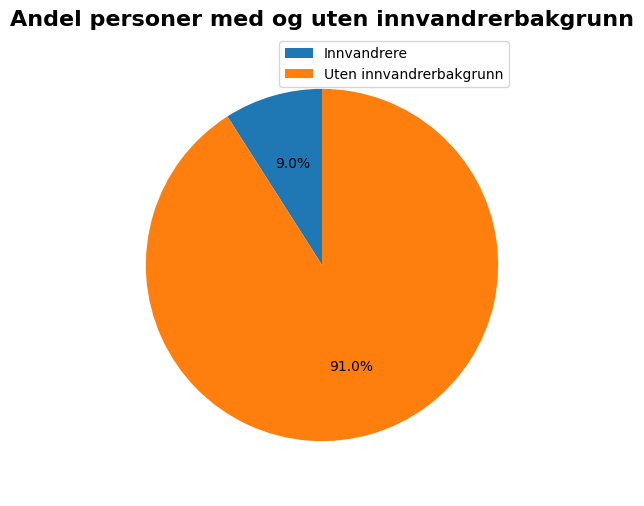

In [277]:
# Summér antall innvandrere
innvandrere = df_B['2025'].sum()
uten_innvandrerbakgrunn = total_befolkning - innvandrere

# Lag kakediagram
fig, ax = plt.subplots(figsize=(5, 6))
plt.pie([innvandrere, uten_innvandrerbakgrunn], autopct='%.1f%%', startangle=90)
plt.title('Andel personer med og uten innvandrerbakgrunn', fontweight='bold', fontsize=16)
plt.axis('equal')
plt.legend(['Innvandrere', 'Uten innvandrerbakgrunn'], loc='upper right')
plt.show()


## Oppgave 3

In [33]:
df_C = pd.read_csv("C:\\Users\\sophi\\OneDrive\\Documents\\Samfunnsøkonomi med datavitenskap\\V25\\SOK-1005\\C.csv", sep=';')

# Lager en ny kolonne 'Sektor' basert på 'Næring'
def bestem_sektor(næring):
    if næring in ['Off.adm., forsvar, sosialforsikring', 'Undervisning', 'Helse- og sosialtjenester']:
        return 'Offentlig sektor'
    else:
        return 'Privat sektor'

df_C['Sektor'] = df_C['Næring'].apply(bestem_sektor)

In [35]:
# Regner ut antall sysselsatte og arbeidsdyktige
arbeidsdyktige_kvinner = df_A['Kvinner'].iloc[4:13].abs().sum()
arbeidsdyktige_menn = df_A['Menn'].iloc[4:13].abs().sum()
arbeidsdyktige = arbeidsdyktige_kvinner + arbeidsdyktige_menn
sysselsatte_total = df_C['2020'].sum()

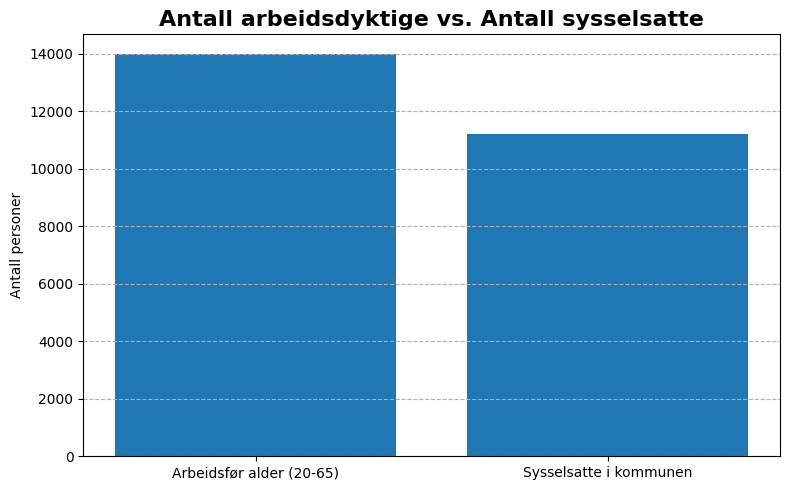

In [36]:
# Danner en figur for antall sysselsatte og arbeidsdyktige
plt.figure(figsize=(8, 5))
plt.bar(['Arbeidsfør alder (20-65)', 'Sysselsatte i kommunen'], [arbeidsdyktige, sysselsatte_total])
plt.title('Antall arbeidsdyktige vs. Antall sysselsatte', fontweight='bold', fontsize=16)
plt.ylabel('Antall personer')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

In [38]:
# https://www.ssb.no/arbeid-og-lonn/sysselsetting/artikler/arbeidsledighet-i-norge

Arbeidsledighet = (arbeidsdyktige - sysselsatte_total) / arbeidsdyktige * 100

if Arbeidsledighet > 5: 
    print(f"Arbeidsledigheten er på et nivå som er høyere enn et nasjonalt gjennomsnitt. Dette vil virke negativt inn på kommunen. I Kristiansund er den på {Arbeidsledighet:.2f}%.")

elif 3 < Arbeidsledighet <= 5 :
    print(f"Arbeidsledigheten er på et nivå som er på linje med et nasjonalt gjennomsnitt. Dette vil virke nøytral inn på kommunen. I Kristiansund er den på {Arbeidsledighet:.2f}%.")
    
else:
    print(f"Arbeidsledigheten er på et nivå som er lavere enn et nasjonalt gjennomsnitt. Dette vil virke positivt inn på kommunen. I Kristiansund er den på {Arbeidsledighet:.2f}%.")

Arbeidsledigheten er på et nivå som er høyere enn et nasjonalt gjennomsnitt. Dette vil virke negativt inn på kommunen. I Kristiansund er den på 19.79%.


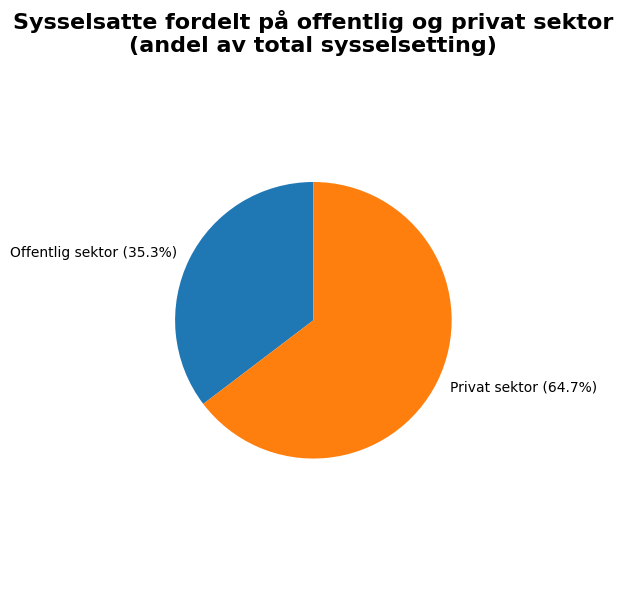

In [40]:
# Oppsummert versjon: vis kun offentlig vs. privat sektor som hovedfokus
sektor_summer = df_C.groupby('Sektor')['2020'].sum()

# Lag enkle etiketter med prosent av totalen
total_sysselsatte = df_C['2020'].sum()
labels = [f'{sektor} ({verdi / total_sysselsatte:.1%})' for sektor, verdi in sektor_summer.items()]

# Plot hovedkakediagram med kun sektorvis fordeling
plt.figure(figsize=(6, 6))
plt.pie(sektor_summer, labels=labels, autopct='', startangle=90)
plt.title('Sysselsatte fordelt på offentlig og privat sektor\n(andel av total sysselsetting)', fontweight='bold', fontsize=16)
plt.axis('equal')
plt.tight_layout()
plt.show()


In [41]:

# Regn ut andelen
andel_privat = df_C[df_C['Sektor'] == 'Privat sektor']['2020'].sum() / total_sysselsatte

# Gi vurdering
if andel_privat > 0.7111:
    print("Privat sektor sysselsetter mer enn 71 % av de sysselsatte i kommunen. Dette er et nivå som er høyere enn det nasjonale, og vil virke positivt inn på kommunen.")
elif 0.6111 < andel_privat <= 0.7111:
    print("Privat sektor sysselsetter mellom 61 % og 71 % av de sysselsatte i kommunen. Dette er et nivå som er omtrent likt det nasjonale, og vil virke nøytralt inn på kommunen.")
else:
    print("Privat sektor sysselsetter mindre enn 61 % av de sysselsatte i kommunen. Dette er et nivå som er lavere enn det nasjonale, og vil virke negativt inn på kommunen.")


Privat sektor sysselsetter mellom 61 % og 71 % av de sysselsatte i kommunen. Dette er et nivå som er omtrent likt det nasjonale, og vil virke nøytralt inn på kommunen.


## Oppgave 4

In [ ]:
# Henter ut data fra CSV-filen
df_D = pd.read_csv("C:\\Users\\sophi\\OneDrive\\Documents\\Samfunnsøkonomi med datavitenskap\\V25\\SOK-1005\\D.csv", sep=';')

# For å gjøre det enklere å hente ut data
df_D = df_D.rename(columns={"Personer 16 år og over": "Antall"})

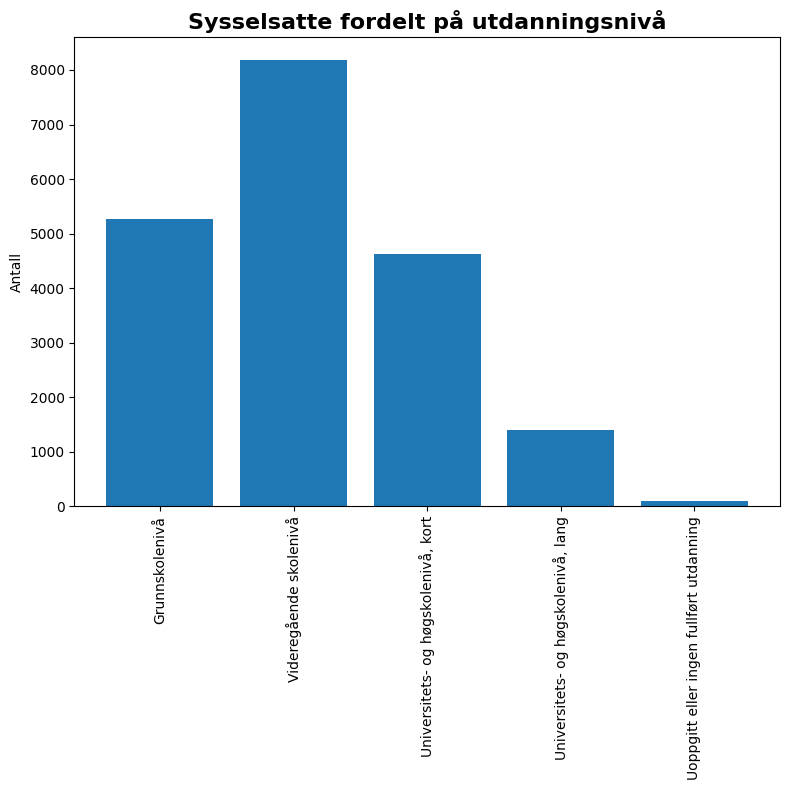

In [42]:
# Danner en figur
plt.figure(figsize=(8, 8))
plt.bar(df_D['Utdanningsnivå'], df_D['Antall'])
plt.title('Sysselsatte fordelt på utdanningsnivå', fontweight='bold', fontsize=16)
plt.ylabel('Antall')
plt.xticks(rotation=90) 
plt.tight_layout()
plt.show()


Mister det helhetlige bilde. Kakediagram er bra til analyse av andel, men ikke er enn dette. Denne andelen kan vi også beregne uten om. Ved å skape en løkke i koden kan vi også programere diagrammer som fyller inn bar plottene og hviser hvilken andel denne utgir av den totale.

## Oppgave 5

In [50]:
# Leser inn CSV-filen
df_E = pd.read_csv("C:\\Users\\sophi\\OneDrive\\Documents\\Samfunnsøkonomi med datavitenskap\\V25\\SOK-1005\\E.csv", sep=';')

# Regner ut budsjett for drift av idrettsanlegg og kulturtilbud i kommunen per person
budsjett_kultur = df_E['2024'].sum()
# Regner ut andel av budsjettet som går til drift av idrettsanlegg
drift_idrett_andel = df_E[df_E['Tjenesteområde'] == 'Kommunale idrettsbygg og idrettsanlegg']['2024'].sum() / budsjett_kultur * 100

# Printer resultatet
print(f"Det totale kultur budsjettet er {budsjett_kultur:.2f} per person. Ut i fra dette budsjettet går {drift_idrett_andel:.2f}% til drift av kommunale idrettsanlegg.")

Det totale kultur budsjettet er 2200.00 per person. Ut i fra dette budsjettet går 28.45% til drift av kommunale idrettsanlegg.


## Oppgave 6

In [ ]:
# Leser inn  CSV-filen
df_F = pd.read_csv("C:\\Users\\sophi\\OneDrive\\Documents\\Samfunnsøkonomi med datavitenskap\\V25\\SOK-1005\\F.csv", sep=';')

# Fjerner mellomrom og konverterer til numerisk
df_F['2024'] = pd.to_numeric(df_F['2024'].str.replace(',', '.'), errors='coerce')

# Summerer prosenten som vi har hentet ut fra CSV-filen
budsjett_prosent = df_F['2024'].sum()

# Printer ut verdien
print(f"Total budsjettandel i 2024 {budsjett_prosent:.2f}%")

df_F['2024'] = df_F['2024'].astype('int64')


Total budsjettandel i 2024 86.00%


Tjenesteområde    object
2024               int64
dtype: object

## Oppgave 7

In [53]:
# Leser inn CSV-filen
df_G = pd.read_csv("C:\\Users\\sophi\\OneDrive\\Documents\\Samfunnsøkonomi med datavitenskap\\V25\\SOK-1005\\G.csv", sep=';')

# Finner totalen for alle biler i 2024
total_biler = df_G['2024'].sum()

# Finner andelen hybridbiler i 2024
andel_hybrid = df_G[df_G['Drivstoff'] == 'Annet drivstoff']['2024'].sum() / total_biler * 100

# Printer ut resultatene
print(f"Det totale antallet biler i 2024 er {total_biler:.0f}. Andelen hybridbiler er {andel_hybrid:.2f}%")

Det totale antallet biler i 2024 er 12769. Andelen hybridbiler er 13.27%


In [45]:
# Regner ut andelen biler i kjørbar alder
kvinner_kjørbare = df_A1['Kvinner'].iloc[2:8].abs().sum()
menn_kjørbare = df_A1['Menn'].iloc[2:8].abs().sum()
kjørbare = kvinner_kjørbare + menn_kjørbare

# Regner ut andelen biler i kjørbar alder
# Kjørbar alder er 20-65 år
andel_kjørbare = total_biler / kjørbare

# Printer ut resultatene
print(f"Antall biler per person i kjørbar alder: {andel_kjørbare:.2f}")


Antall biler per person i kjørbar alder: 0.70


## Oppgave 8

C:\Users\sophi\AppData\Local\Temp\ipykernel_8736\920833119.py:40: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels([str(abs(int(tick))) for tick in ticks])


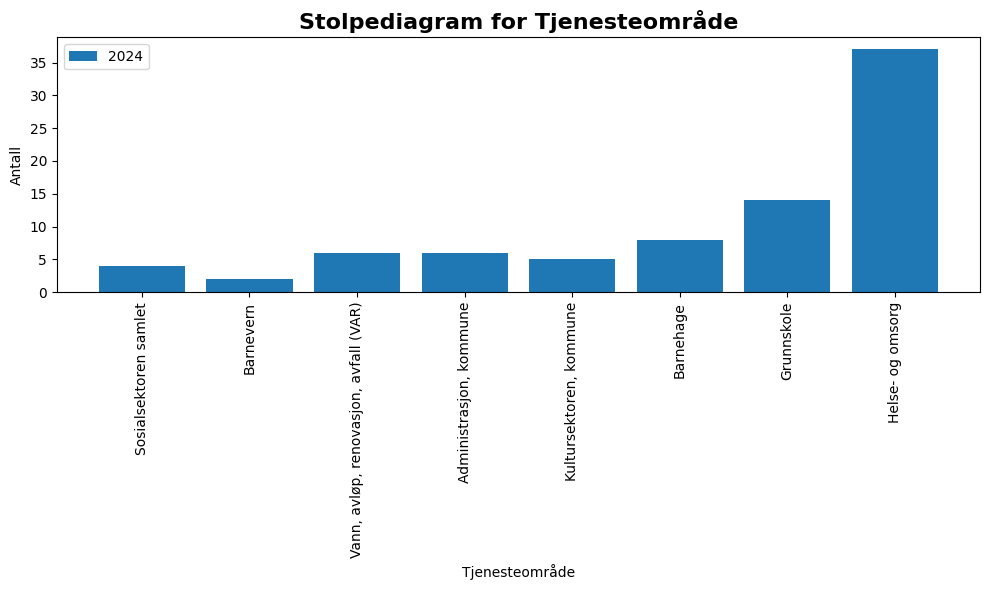

In [155]:
# Danner en funskjon som skal lage et stolpediagram ut i fra hvilket som helst datasett. 
# Vi tar utgangspunkt i at datasettet sin første kolonnne er en "kategorikolonne" og at de resterende kolonnene er verdikolonner med heltall.

def stolpediagram(df):
    # Setter kolonne 1 som kategorikolonne
    kategori_kolonne = df.columns[0]

    # Verdikolonner = int-type kolonner etter kolonne 0
    verdikolonner = [kol for kol in df.columns[1:] if pd.api.types.is_integer_dtype(df[kol])]
    if not verdikolonner:
        print("Ingen verdikolonner med heltall funnet.")
        return

    # Lagrer kategorier
    kategorier = df[kategori_kolonne]

    # Bestemmer bredde og posisjon for stolper
    antall_serier = len(verdikolonner)
    bredde = 0.8 / antall_serier
    x = list(range(len(kategorier)))

    # Setter størrelsen på figuren
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotter hver verdikolonne
    for i, kolonnenavn in enumerate(verdikolonner):
        forskyvning = [(xi + i * bredde) for xi in x]
        ax.bar(forskyvning, df[kolonnenavn], width=bredde, label=kolonnenavn)

    # Sentrerer x-ticks
    midtpunkt = [xi + (bredde * (antall_serier - 1) / 2) for xi in x]
    ax.set_xticks(midtpunkt)
    ax.set_xticklabels(kategorier, rotation=90)

    # Midtstilt akse
    ax.axhline(0, color='black', linewidth=0.5)

    # Y-akse som absoluttverdi
    ticks = ax.get_yticks()
    ax.set_yticklabels([str(abs(int(tick))) for tick in ticks])

    # Legger til tittel og aksetekster
    plt.title(f"Stolpediagram for {kategori_kolonne}", fontweight='bold', fontsize=16)
    plt.xlabel(kategori_kolonne)
    plt.ylabel("Antall")
    plt.legend()
    plt.tight_layout()
    plt.show()

stolpediagram(df_F)

## Oppgave 9

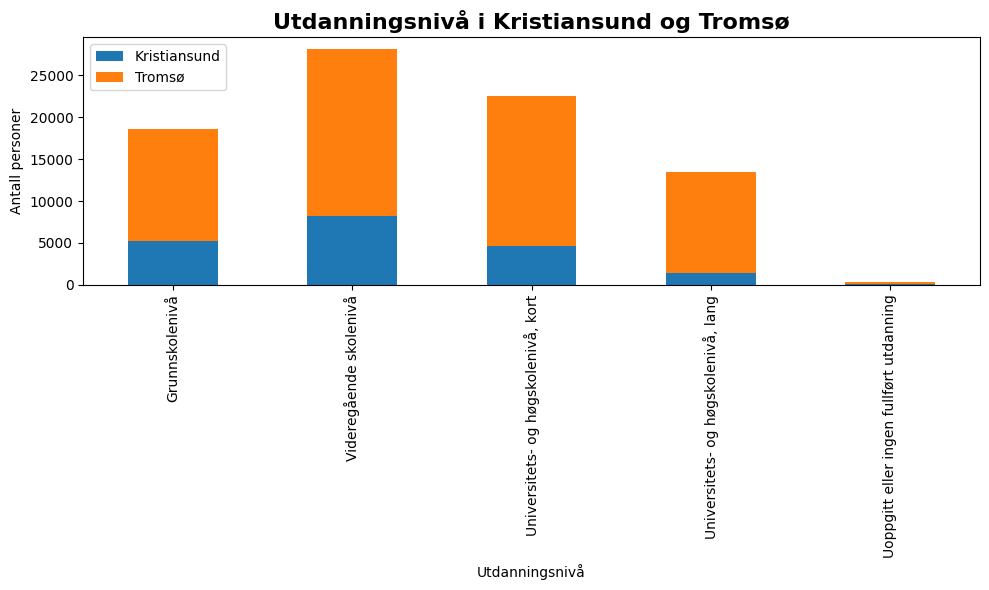

In [168]:
# leser inn CSV-filen
df_TU = pd.read_csv("C:\\Users\\sophi\\OneDrive\\Documents\\Samfunnsøkonomi med datavitenskap\\V25\\SOK-1005\\TU.csv", sep=';')

# slårsammen df_D og df_TU på 'Utdanningsnivå' for enkelere bruk
df_utdanningsnivå= pd.merge(df_D, df_TU, on='Utdanningsnivå', how='inner') 

# Endrer navn slik at det blir lettere å forstå hva som er hva
df_utdanningsnivå = df_utdanningsnivå.rename(columns={
    'Antall': 'Kristiansund',
    'Personer 16 år og over': 'Tromsø',
})

df_utdanningsnivå = df_utdanningsnivå[['Utdanningsnivå',
         'Kristiansund', 
         'Tromsø']]

# Sett 'Utdanningsnivå' som indeks
df_utdanningsnivå = df_utdanningsnivå.set_index('Utdanningsnivå')

# Danner bar plot
df_utdanningsnivå.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Utdanningsnivå i Kristiansund og Tromsø', fontweight='bold', fontsize=16)
plt.ylabel('Antall personer')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [169]:
df_TJ = pd.read_csv("C:\\Users\\sophi\\OneDrive\\Documents\\Samfunnsøkonomi med datavitenskap\\V25\\SOK-1005\\TJ.csv", sep=';')
df_næring= pd.merge(df_C, df_TJ, on='Næring', how='inner', suffixes=('Kristiansund', 'Tromsø')) 
df_næring = df_næring.rename(columns={
    '2020Kristiansund': 'Kristiansund',
    '2020Tromsø': 'Tromsø',
    'Næring': 'Næringsgruppe',
    'Sektor': 'Sektor'
})
df_næring = df_næring[['Næringsgruppe', 'Sektor', 
         'Kristiansund', 
         'Tromsø']]

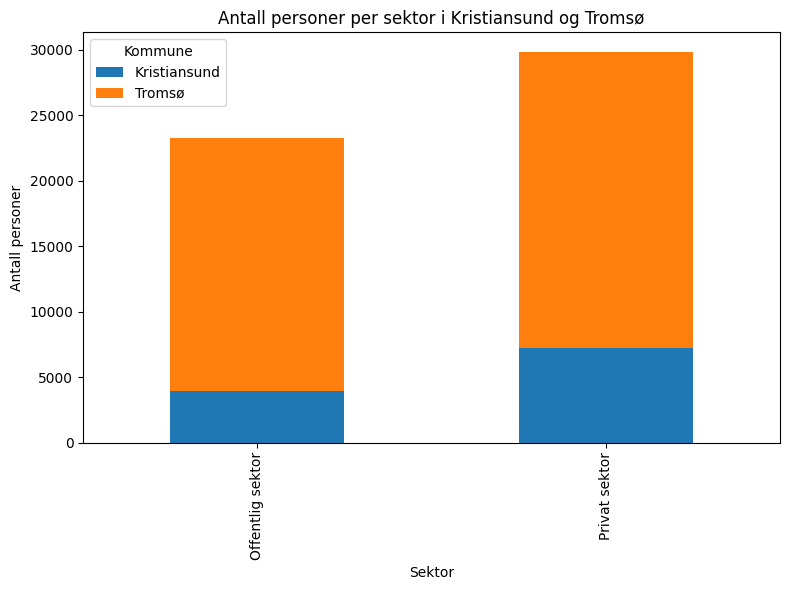

In [170]:
# Gruppér etter sektor og summer antall personer per kommune
df_sektor = df_næring.groupby('Sektor')[['Kristiansund', 'Tromsø']].sum().reset_index()

# Plot som stablet stolpediagram
df_sektor.plot(kind='bar', x='Sektor', stacked=True, figsize=(8, 6))
plt.title('Antall personer per sektor i Kristiansund og Tromsø')
plt.ylabel('Antall personer')
plt.xlabel('Sektor')
plt.legend(title='Kommune')
plt.tight_layout()
plt.show()


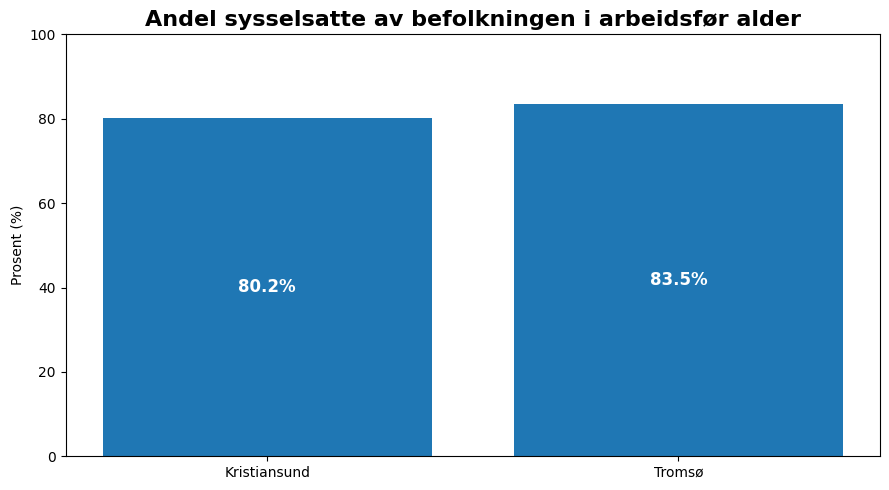

In [174]:
# Les inn og slå sammen datasett
df_TA = pd.read_csv("C:\\Users\\sophi\\OneDrive\\Documents\\Samfunnsøkonomi med datavitenskap\\V25\\SOK-1005\\TA.csv", sep=';')
df_folk = pd.merge(df_A, df_TA, on='Alder', how='inner', suffixes=('_Kristiansund', '_Tromsø')) 

# Hent ut data for arbeidsfør alder (15–74 år)
kvinner_tromsø = df_folk['Kvinner_Tromsø'].iloc[4:13].abs()
menn_tromsø = df_folk['Menn_Tromsø'].iloc[4:13].abs()
tromsø = kvinner_tromsø + menn_tromsø

kvinner_kristiansund = df_folk['Kvinner_Kristiansund'].iloc[4:13].abs()
menn_kristiansund = df_folk['Menn_Kristiansund'].iloc[4:13].abs()
kristiansund = kvinner_kristiansund + menn_kristiansund

# Summer arbeidstakere og befolkning
arbeid_kristiansund = df_næring['Kristiansund'].sum()
arbeid_tromsø = df_næring['Tromsø'].sum()

# Beregn andeler
andel_kristiansund = arbeid_kristiansund / kristiansund.sum() * 100
andel_tromsø = arbeid_tromsø / tromsø.sum() * 100

# Lag stolpediagram
plt.figure(figsize=(9, 5))
labels = ['Kristiansund', 'Tromsø']
values = [andel_kristiansund, andel_tromsø]
bars = plt.bar(labels, values)

# Legg til tekst inne i stolpene
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height() / 2,
             f'{value:.1f}%',
             ha='center', va='center', color='white', fontsize=12, fontweight='bold')

# Diagramstil
plt.title('Andel sysselsatte av befolkningen i arbeidsfør alder', fontweight='bold', fontsize=16)
plt.ylabel('Prosent (%)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()
